<h1>DNN-Bootcamp Day 2 Assignment

1: Develop a Linear Regression model with multiple variables and multiple training examples.

In [20]:
#load dataset
import pandas as pd
import numpy as np
dataset = pd.read_csv('data.csv')
dataset.head()
# Xtrain and y train
X_train = dataset[['bedrooms','bathrooms','yr_built']].to_numpy()
y_train = dataset['price'].to_numpy()
print(f"SHAPE: X_train: {X_train.shape}\nSHAPE: y_train: {y_train.shape}")

def compute_model_output(x,y,w,b):
    m=X_train.shape[0]
    predictions=np.zeros(m)
    for i in range(m):
        predictions[i]=np.dot(x[i],w)+b
    return predictions

print(compute_model_output(X_train,y_train,[120,100,80],100))





SHAPE: X_train: (4600, 3)
SHAPE: y_train: (4600,)
[157010. 154630. 157940. ... 161430. 158700. 159910.]


2: Implement a cost function and gradient descent algorithm to optimize the model's parameters. 

In [36]:
def cost_function(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        tmp_cost=(((np.dot(x[i],w)+b)-y[i])**2)
        cost+=tmp_cost
    cost*=1/(2*m)
    return cost
print(cost_function(X_train,y_train,[120,100,80],100))

def compute_gradient(x,y,w,b):
    dj_db=0
    m=x.shape[0]
    dj_dw=np.zeros_like(w)
    for i in range(m):
        dj_db_i=((np.dot(x[i],w)+b)-y[i])
        dj_dw_i=((np.dot(x[i],w)+b)-y[i])*x[i]
        dj_db+=dj_db_i
        dj_dw+=dj_dw_i
    dj_db/=m
    dj_dw/=m
    return dj_dw,dj_db

def gradient_descend(x,y,w,b,compute_gradient,cost_function,iters,alpha):
    J_history=[]  
    p_history=[]
    for i in range(iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        b=b-alpha*dj_db
        w=w-alpha*dj_dw
        J_history.append(cost_function(x,y,w,b))
        p_history.append((w,b))
        if(i%100==0):
            print(f"Iteration {i}: Cost:{J_history[-1]} Parameters:{p_history[-1]}")
    return w,b,J_history,p_history

w = np.zeros(X_train.shape[1])
b=0
iters=1000
alpha=0.0000000001
w_opt,b_opt,j,p=gradient_descend(X_train,y_train,w,b,compute_gradient,cost_function,iters,alpha)



236318114349.10922
Iteration 0: Cost:311133412397.6289 Parameters:(array([0.00019798, 0.00013372, 0.10881674]), 5.519629884732141e-05)
Iteration 100: Cost:299747322409.6518 Parameters:(array([ 0.01963205,  0.01327425, 10.77971719]), 0.005467901433342466)
Iteration 200: Cost:289212572106.2269 Parameters:(array([ 0.0383641 ,  0.02596786, 21.04393548]), 0.010674298235110232)
Iteration 300: Cost:279465506687.63446 Parameters:(array([ 0.05642087,  0.03823157, 30.91697081]), 0.015682249385666057)
Iteration 400: Cost:270447230833.36725 Parameters:(array([ 0.0738281 ,  0.05008177, 40.41373166]), 0.020499317909406508)
Iteration 500: Cost:262103252835.12256 Parameters:(array([ 0.09061054,  0.06153423, 49.54855836]), 0.025132778593935614)
Iteration 600: Cost:254383155338.05402 Parameters:(array([ 0.10679201,  0.07260409, 58.3352447 ]), 0.029589628975147577)
Iteration 700: Cost:247240290700.71518 Parameters:(array([ 0.12239541,  0.08330595, 66.78705875]), 0.0338765999036535)
Iteration 800: Cost:24

3: Visualize the model's performance and the dataset using plots to gain insights and analyze the results.

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


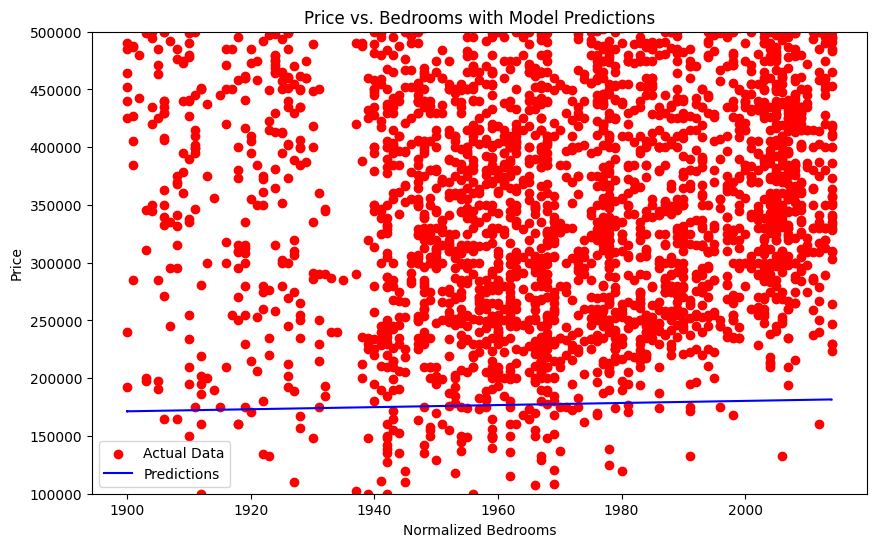

In [48]:
import matplotlib.pyplot as plt
def compute_model_output1(x,w,b):
    return np.dot(x,w)+b
feature_index = 2  # 0 for 'bedrooms', 1 for 'bathrooms', 2 for 'yr_built'
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, feature_index], y_train, color='red', label='Actual Data')

# Sort data for plotting
sorted_indices = np.argsort(X_train[:, feature_index])
sorted_feature = X_train[sorted_indices, feature_index]
sorted_predictions = compute_model_output1(X_train, w_opt, b_opt)[sorted_indices]
print(y_train)
plt.plot(sorted_feature, sorted_predictions, color='blue', label='Predictions')
plt.xlabel('Normalized Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Bedrooms with Model Predictions')
plt.ylim(100000, 500000)
plt.legend()
plt.show()